# Animated Brownian Motion in Python
The Borwnian Motion or also known as a Wiener Process is a random process that satisfies the Lévy properties:
- W_{0} = 0
- Independent Increments: the future increments are independent from the past increments, i.e. W_{u + t} - W_{t} is independent of W_{s} for every s < t
- Stationary Increments: the increment W_{u + t} - W_{t} is equal in distribution to W_{u}
- Continuity in probability

Here we construct a Brownian Motion using the Donsker's theorem the convergnece of a normalized random walk to a Brownian Motion.

In [10]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# set a random seed
np.random.seed(1234)

In [11]:
def brownian_motion(N, T, h):
    """
    Simulates a Brownian motion
    :param int N : the number of discrete steps
    :param int T: the number of continuous time steps
    :param float h: the variance of the increments
    """   
    # the normalizing constant
    dt = 1. * T/N
    # the epsilon values
    random_increments = np.random.normal(0.0, 1.0 * h, N)*np.sqrt(dt)
    # calculate the brownian motion
    brownian_motion = np.cumsum(random_increments)
    # insert the initial condition
    brownian_motion = np.insert(brownian_motion, 0, 0.0)
    
    return brownian_motion, random_increments

In [12]:
N = 50 # the number of discrete steps
T = 1 # the number of continuous time steps
h = 1 # the variance of the increments
dt = 1.0 * T/N  # total number of time steps

# generate a brownian motion
X, epsilon = brownian_motion(N, T ,h)
t = np.linspace(0.0, N*dt, N+1)

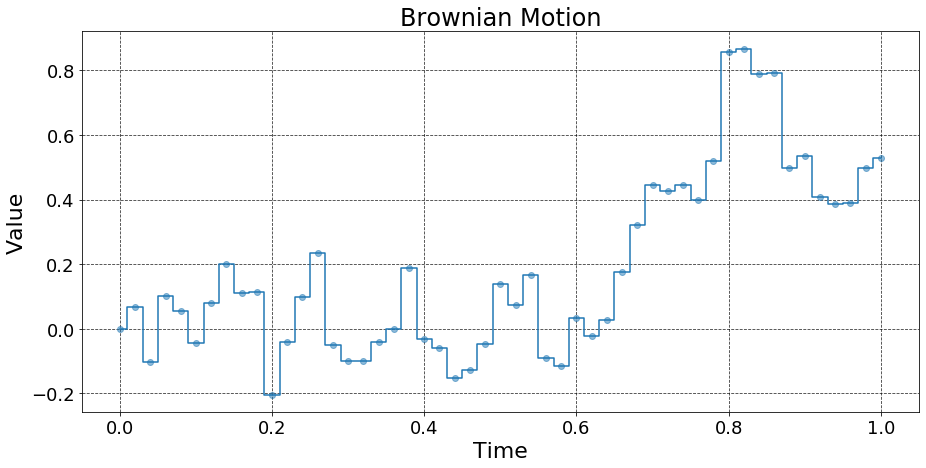

In [13]:
# plot the brownian motion
plt.figure(figsize=(15, 7))
plt.title('Brownian Motion', fontsize=24)
plt.xlabel('Time', fontsize=22)
plt.ylabel('Value', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(True, which='major', linestyle='--', color='black', alpha=0.8)
plt.step(t, X, where='mid')
plt.plot(t, X, 'C0o', alpha=0.5)
plt.show()

# Animate the Brownian Motion

We illustrate the Donsker's Invariance Principle. We continually increase the number of steps **N**, converging to a Brownian Motion.

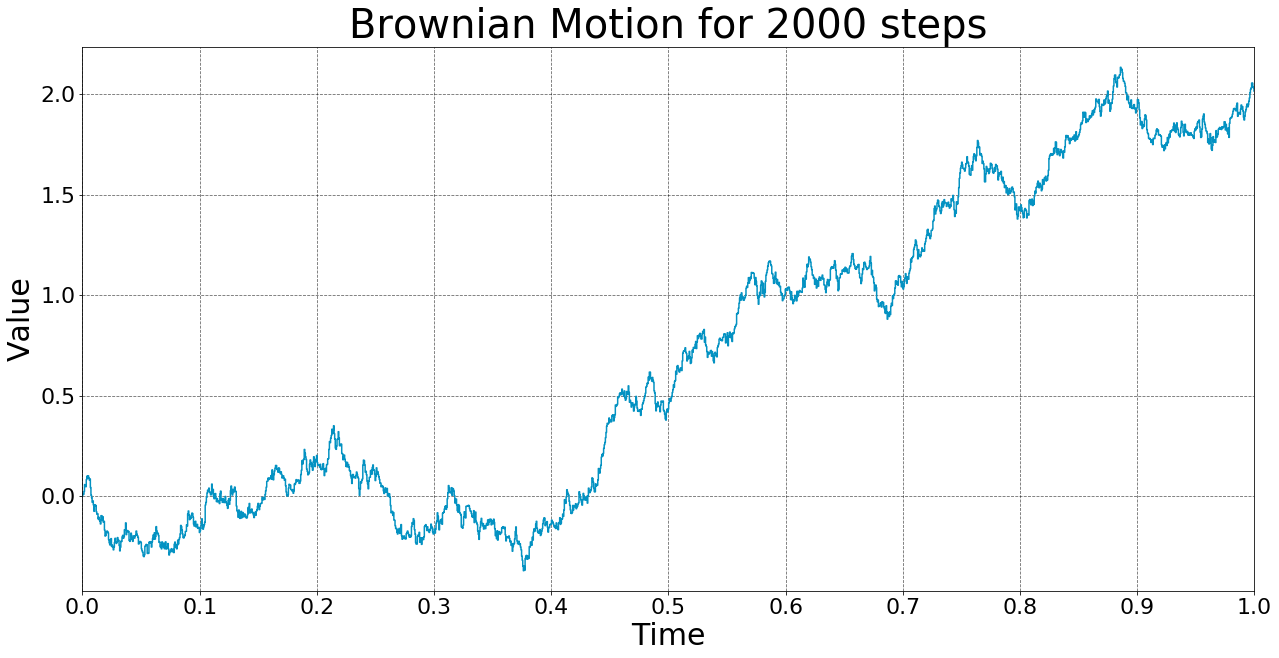

In [15]:
fig = plt.figure(figsize=(21, 10))
ax = plt.axes(xlim=(0, 1)) 
line, = ax.step([], [], where='mid', color='#0492C2')
    
# formatting options
ax.set_xticks(np.linspace(0,1,11))
ax.set_xlabel('Time', fontsize=30)
ax.set_ylabel('Value', fontsize=30)
ax.tick_params(labelsize=22)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)

# initialization function 
def init():
    line.set_data([], [])
    return line,

# animation function 
def animate(i):
    np.random.seed(42)
    y, epsilon = brownian_motion((i + 1) * 10, 1 ,1)
    tr = np.linspace(0.0, 1, (i + 1) * 10 + 1)
    ax.set_title('Brownian Motion for {} steps'.format((i + 1) * 10), fontsize=40)
    ax.set_ylim((np.min(y) - 0.1, np.max(y) + 0.1))
    
    line.set_data(list(tr), list(y)) 
    return line,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=150, blit=True)
anim.save('brownian_motion.gif',writer="imagemagick") 

# Simulate the Gaussian Increments
The increments of the Brownian Motion are Gaussian, i.e. for u > 0 W_{t + u} - W_{t} -> Normal(0, u). We will simulate this universal truth and will run a statistical test to show that the distribution holds.

In [19]:
from scipy import stats

num_simulations = 10000  # how many times to repeat
Ns, Ts, hs = 20000, 10.0, 1.0 # discrete steps, continuous steps, veriance
dts = 1.0 * T/N  # total number of time steps

u = 2.  # the difference in time points
t = int(np.floor((np.random.uniform(low=u+0.01, high=1. * T - u)/T) * N)) # random starting point

# initialize the means
rand_val_t = np.zeros(num_simulations)
rand_val_t_plus_u = np.zeros(num_simulations)
rand_val_t_minus_u = np.zeros(num_simulations)

for i in range(num_simulations):
    # generate a brownian motion
    Xs, _ = brownian_motion(Ns, Ts, hs)
  
    # store the means at the two points
    rand_val_t[i] = Xs[t]
    rand_val_t_plus_u[i] = Xs[t + int(u*Ns/Ts)]

# calculate the difference
diff = rand_val_t_plus_u - rand_val_t

# print stats
print('The mean is: {0}'.format(np.mean(diff)))
print('The variance is: {0}'.format(np.var(diff)))

# make normality test with null hypothesis: x comes from a normal distribution
k2, p = stats.normaltest(diff)
print("Null hypothesis can be rejected") if p < 1e-3 else print("Null hypothesis cannot be rejected")

The mean is: 0.003096116635542448
The variance is: 2.0406280792576452
Null hypothesis cannot be rejected


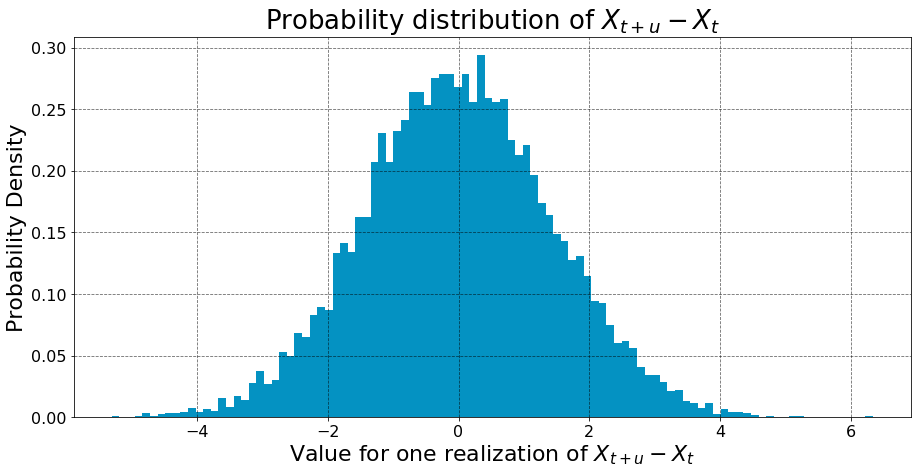

In [28]:
# plot the distribution of the differences
plt.figure(figsize=(15, 7))
plt.grid(True, which='major', linestyle='--', color='black', alpha=0.6)
plt.title(r'Probability distribution of $X_{t+u} - X_{t}$', fontsize=26)
plt.xlabel('Value for one realization of $X_{t+u} - X_{t}$', fontsize=22)
plt.ylabel('Probability Density', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
n, bins, patches = plt.hist(diff, 100, density=True, color='#0492C2')
plt.savefig('brownian_motion_gauss_incr.png', dpi=300, bbox_inches='tight')